In [256]:
#!pip install statsmodels
#!pip install scipy

In [257]:
#import the libraries
import pandas as pd
import numpy as np
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [258]:
# Read Sales.Dirty.xls
salesdf = pd.read_excel('Sales.xls')

In [259]:
salesdf.dtypes

Row ID                           int64
Order ID                         int64
Order Date              datetime64[ns]
Order Priority                  object
Order Quantity                   int64
Sales                          float64
Discount                       float64
Ship Mode                       object
Profit                         float64
Unit Price                     float64
Shipping Cost                  float64
Customer Name                   object
Province                        object
Region                          object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Name                    object
Product Container               object
Product Base Margin            float64
Ship Date               datetime64[ns]
dtype: object

In [260]:
salesdf.shape

(8399, 21)

In [261]:
salesdf.head(10)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30
5,86,515,2010-08-28,Not Specified,21,146.6900,0.05,Regular Air,4.4300,6.64,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Furniture,Office Furnishings,G.E. Longer-Life Indoor Recessed Floodlight Bulbs,Small Pack,0.37,2010-08-30
6,97,613,2011-06-17,High,12,93.5400,0.03,Regular Air,-54.0385,7.30,...,Carl Jackson,Nunavut,Nunavut,Corporate,Office Supplies,Binders and Binder Accessories,"Angle-D Binders with Locking Rings, Label Holders",Small Box,0.38,2011-06-17
7,98,613,2011-06-17,High,22,905.0800,0.09,Regular Air,127.7000,42.76,...,Carl Jackson,Nunavut,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Mobile Desk Side File, Wire Frame",Small Box,NaN,2011-06-18
8,103,643,2011-03-24,High,21,2781.8200,0.07,Express Air,-695.2600,138.14,...,Monica Federle,Nunavut,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box,NaN,2011-03-25
9,107,678,2010-02-26,Low,44,228.4100,0.07,Regular Air,-226.3600,4.98,...,Dorothy Badders,Nunavut,Nunavut,Home Office,Office Supplies,Paper,Xerox 198,Small Box,0.38,2010-02-26


## Anova Tests

In [262]:
model = ols('Sales ~ C(Q("Order Priority"))', data=salesdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Sales - Order Priority")
display(anova_table)


Anova => Sales - Order Priority


,sum_sq,df,F,PR(>F)
"C(Q(""Order Priority""))",7.261269e+07,4.0,1.412692,0.226894
Residual,1.078634e+11,8394.0,NaN,NaN


In [263]:
model = ols('Sales ~ C(Q("Ship Mode"))', data=salesdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Sales - Ship Mode")
display(anova_table)


Anova => Sales - Ship Mode


,sum_sq,df,F,PR(>F)
"C(Q(""Ship Mode""))",1.773769e+10,2.0,825.545281,0.0
Residual,9.019834e+10,8396.0,NaN,NaN


In [264]:
model = ols('Sales ~ C(Q("Region"))', data=salesdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Sales - Region")
display(anova_table)


Anova => Sales - Region


,sum_sq,df,F,PR(>F)
"C(Q(""Region""))",1.028260e+08,7.0,1.143053,0.332599
Residual,1.078332e+11,8391.0,NaN,NaN


In [265]:
model = ols('Sales ~ C(Q("Province"))', data=salesdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Sales - Province")
display(anova_table)


Anova => Sales - Province


,sum_sq,df,F,PR(>F)
"C(Q(""Province""))",2.081083e+08,12.0,1.350003,0.182509
Residual,1.077279e+11,8386.0,NaN,NaN


In [266]:
model = ols('Sales ~ C(Q("Customer Segment"))', data=salesdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Sales - Customer Segment")
display(anova_table)


Anova => Sales - Customer Segment


,sum_sq,df,F,PR(>F)
"C(Q(""Customer Segment""))",2.238326e+07,3.0,0.580425,0.627813
Residual,1.079136e+11,8395.0,NaN,NaN


In [267]:
model = ols('Sales ~ C(Q("Product Category"))', data=salesdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Sales - Product Category")
display(anova_table)


Anova => Sales - Product Category


,sum_sq,df,F,PR(>F)
"C(Q(""Product Category""))",9.464206e+09,2.0,403.473146,4.908931e-168
Residual,9.847182e+10,8396.0,NaN,NaN


In [268]:
model = ols('Sales ~ C(Q("Product Sub-Category"))', data=salesdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Sales - Product Sub-Category")
display(anova_table)


Anova => Sales - Product Sub-Category


,sum_sq,df,F,PR(>F)
"C(Q(""Product Sub-Category""))",3.410615e+10,16.0,242.00718,0.0
Residual,7.382988e+10,8382.0,NaN,NaN


In [269]:
model = ols('Sales ~ C(Q("Product Container"))', data=salesdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Sales - Product Container")
display(anova_table)


Anova => Sales - Product Container


,sum_sq,df,F,PR(>F)
"C(Q(""Product Container""))",2.530821e+10,6.0,428.399995,0.0
Residual,8.262781e+10,8392.0,NaN,NaN


## Tukey Tests

In [270]:
salesdf['Ship Mode'].unique()

array(['Regular Air', 'Delivery Truck', 'Express Air'], dtype=object)

In [271]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=salesdf['Sales'],
                          groups=salesdf['Ship Mode'],
                          alpha=0.05)

#display results
print(tukey)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1        group2    meandiff  p-adj    lower      upper    reject
-------------------------------------------------------------------------
Delivery Truck Express Air -4226.9291    0.0 -4560.9404 -3892.9178   True
Delivery Truck Regular Air -4234.6538    0.0 -4481.4856  -3987.822   True
   Express Air Regular Air    -7.7247 0.9974  -271.2915   255.8421  False
-------------------------------------------------------------------------


In [272]:
salesdf['Product Category'].unique()

array(['Office Supplies', 'Technology', 'Furniture'], dtype=object)

In [273]:
tukey = pairwise_tukeyhsd(endog=salesdf['Sales'],
                          groups=salesdf['Product Category'],
                          alpha=0.05)

#display results
print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
     group1          group2      meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------------------
      Furniture Office Supplies -2189.7746    0.0 -2416.4055 -1963.1438   True
      Furniture      Technology  -105.8818 0.6101  -367.7801   156.0165  False
Office Supplies      Technology  2083.8928    0.0  1871.3168  2296.4688   True
------------------------------------------------------------------------------


In [274]:
salesdf['Product Sub-Category'].unique()

array(['Storage & Organization', 'Appliances',
       'Binders and Binder Accessories', 'Telephones and Communication',
       'Office Furnishings', 'Paper', 'Rubber Bands',
       'Computer Peripherals', 'Envelopes', 'Bookcases', 'Tables',
       'Labels', 'Pens & Art Supplies', 'Copiers and Fax',
       'Chairs & Chairmats', 'Scissors, Rulers and Trimmers',
       'Office Machines'], dtype=object)

In [275]:
salesdf['Product Sub-Category'].nunique()

17

In [276]:
tukey = pairwise_tukeyhsd(endog=salesdf['Sales'],
                          groups=salesdf['Product Sub-Category'],
                          alpha=0.05)

#display results
print(tukey)

                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                              
            group1                         group2               meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------------------------------------------------------
                    Appliances Binders and Binder Accessories   -580.1508 0.0695  -1178.5716     18.2701  False
                    Appliances                      Bookcases   2654.5191    0.0   1759.7223   3549.3159   True
                    Appliances             Chairs & Chairmats   2866.2062    0.0   2147.8752   3584.5372   True
                    Appliances           Computer Peripherals   -648.1689 0.0285  -1266.2064    -30.1314   True
                    Appliances                Copiers and Fax  11294.5214    0.0  10088.4569   12500.586   True
                    Appliances                      Envelopes   -990.4713 0.0034  -1809.8756   -171.0671

In [277]:
tukey = pairwise_tukeyhsd(endog=salesdf['Sales'],
                          groups=salesdf['Product Container'],
                          alpha=0.05)

#display results
print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1     group2    meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------------
 Jumbo Box Jumbo Drum    155.259 0.9809  -390.8024   701.3205  False
 Jumbo Box  Large Box  -197.4478 0.9633  -807.2561   412.3605  False
 Jumbo Box Medium Box -3404.6195    0.0 -4033.0431 -2776.1958   True
 Jumbo Box  Small Box -4132.5012    0.0  -4557.537 -3707.4654   True
 Jumbo Box Small Pack -4731.2225    0.0 -5231.7494 -4230.6956   True
 Jumbo Box   Wrap Bag -5059.4642    0.0 -5543.4782 -4575.4501   True
Jumbo Drum  Large Box  -352.7068 0.5734  -942.7367   237.3231  False
Jumbo Drum Medium Box -3559.8785    0.0 -4169.1284 -2950.6286   True
Jumbo Drum  Small Box -4287.7603    0.0 -4683.8973 -3891.6232   True
Jumbo Drum Small Pack -4886.4816    0.0  -5362.713 -4410.2502   True
Jumbo Drum   Wrap Bag -5214.7232    0.0 -5673.5682 -4755.8782   True
 Large Box Medium Box -3207.1717  

## Chi-Squared Tests

In [278]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# count of occurences of all combinations of the 2 columns
data_crosstab = pd.crosstab(salesdf['Customer Segment'], salesdf['Product Category'], 
margins = False) 
print(data_crosstab) 



Product Category  Furniture  Office Supplies  Technology
Customer Segment                                        
Consumer                358              865         426
Corporate               633             1680         763
Home Office             406             1145         481
Small Business          327              920         395


In [279]:
stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


dof=6
[[ 338.47791404  905.09465413  405.42743184]
 [ 631.38754614 1688.33908799  756.27336588]
 [ 417.09346351 1115.31372782  499.59280867]
 [ 337.04107632  901.25253006  403.70639362]]
significance=0.050, p=0.349
Independent (fail to reject H0)


In [280]:
data_crosstab = pd.crosstab(salesdf['Product Container'], salesdf['Product Category'], 
margins = False) 
print(data_crosstab) 

stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


Product Category   Furniture  Office Supplies  Technology
Product Container                                        
Jumbo Box                488                0          44
Jumbo Drum               374               75         175
Large Box                164              160          82
Medium Box               119               89         158
Small Box                249             3059        1039
Small Pack               210              252         494
Wrap Bag                 120              975          73
dof=12
[[ 109.19966663  292.00142874  130.79890463]
 [ 128.0838195   342.49791642  153.41826408]
 [  83.33658769  222.84319562   99.82021669]
 [  75.12608644  200.88820098   89.98571258]
 [ 892.27622336 2385.95904274 1068.7647339 ]
 [ 196.23097988  524.72437195  235.04464817]
 [ 239.7466365   641.08584355  287.16751994]]
significance=0.050, p=0.000
Dependent (reject H0)


## t-tests

In [281]:
salesdf.dtypes

Row ID                           int64
Order ID                         int64
Order Date              datetime64[ns]
Order Priority                  object
Order Quantity                   int64
Sales                          float64
Discount                       float64
Ship Mode                       object
Profit                         float64
Unit Price                     float64
Shipping Cost                  float64
Customer Name                   object
Province                        object
Region                          object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Name                    object
Product Container               object
Product Base Margin            float64
Ship Date               datetime64[ns]
dtype: object

In [282]:
#Extracts the data types of each column and stores them in a dictionary called types_map. 
#Then select data in numeric format to be kept in a num_columns list. 
# Allows to have the list of all numerical columns

types_map = salesdf.dtypes.to_dict()
num_columns = []
for k,v in types_map.items():
    if np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v):
        num_columns.append(k)

print(num_columns)




['Row ID', 'Order ID', 'Order Quantity', 'Sales', 'Discount', 'Profit', 'Unit Price', 'Shipping Cost', 'Product Base Margin']


In [283]:
# independent two-sample t-test 
# The t-test is used to determine whether there is a significant difference between the means of these two samples.

t_val, p_val = stats.ttest_ind(salesdf[num_columns[3]], salesdf[num_columns[8]])
print("(Sales,Profit) => t-value=%s, p-value=%s" % (str(t_val), str(p_val)))

(Sales,Profit) => t-value=nan, p-value=nan


Nans? 

Possible that one or both of the samples being compared in the t-test contain missing values (NaNs). As a result, the t-test function (stats.ttest_ind) returns NaN values for the t-value and p-value. Attempt to remove the missing values to see the results. Hence, this highlights the importance of DATA WRANGLING before EDA.

In [284]:
salesdf[num_columns[3]].fillna(0, inplace=True)  # Fill missing values with 0
salesdf[num_columns[8]].fillna(0, inplace=True)

t_val, p_val = stats.ttest_ind(salesdf[num_columns[3]], salesdf[num_columns[8]])
print("(Sales,Profit) => t-value=%s, p-value=%s" % (str(t_val), str(p_val)))

(Sales,Profit) => t-value=45.38446985207996, p-value=0.0


Comparing 'Sales' and 'Profit' could be more appropriately approached using correlation analysis, such as Pearson correlation coefficient, which measures the linear relationship between two continuous variables.

Better example here could have been to compare a categorical variable with 2 categories VS Sales. Example, a comparison of gender and sales or if there were 2 categories however, we are limited to the columns available in this dataset. 

# IN-CLASS SUBMISSION
Zuha Aqib 26106, 10am Batch

In [285]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## ANOVA

In [286]:
variables = ['Order Priority', 'Ship Mode', 'Region', 'Province', 'Customer Segment', 'Product Category', 'Product Sub-Category', 'Product Container']

In [287]:
for variable in variables:
    model = ols(f'Profit ~ C(Q("{variable}"))', data=salesdf).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    print (f"\nAnova => Profit - {variable}")
    # display(anova_table)

    # Extract the p-value
    p_value = anova_table["PR(>F)"].iloc[0]  # Extracting p-value from ANOVA table

    # Decision based on p-value
    alpha = 0.05
    if p_value < alpha:
        print(f"  P-value ({p_value:.5f}) < 0.05: Reject the null hypothesis. There is a significant effect of '{variable}' on 'Profit'.")
    else:
        print(f"  P-value ({p_value:.5f}) >= 0.05: Fail to reject the null hypothesis. '{variable}' does not significantly affect 'Profit'.")


Anova => Profit - Order Priority
  P-value (0.00817) < 0.05: Reject the null hypothesis. There is a significant effect of 'Order Priority' on 'Profit'.

Anova => Profit - Ship Mode
  P-value (0.21008) >= 0.05: Fail to reject the null hypothesis. 'Ship Mode' does not significantly affect 'Profit'.

Anova => Profit - Region
  P-value (0.51211) >= 0.05: Fail to reject the null hypothesis. 'Region' does not significantly affect 'Profit'.

Anova => Profit - Province
  P-value (0.31813) >= 0.05: Fail to reject the null hypothesis. 'Province' does not significantly affect 'Profit'.

Anova => Profit - Customer Segment
  P-value (0.69352) >= 0.05: Fail to reject the null hypothesis. 'Customer Segment' does not significantly affect 'Profit'.

Anova => Profit - Product Category
  P-value (0.00000) < 0.05: Reject the null hypothesis. There is a significant effect of 'Product Category' on 'Profit'.

Anova => Profit - Product Sub-Category
  P-value (0.00000) < 0.05: Reject the null hypothesis. Ther

so we got to know that profit is affected by order priority, product category, product sub-category, product container. thus we will perform tukey test on these 4

## Tukey Test

In [288]:
def apply_tukey(variable1, variable2):
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    
    print(salesdf[variable2].unique(), "\n")

    tukey = pairwise_tukeyhsd(endog=salesdf[variable1],
                            groups=salesdf[variable2],
                            alpha=0.05)

    #display results
    print(tukey)

    # Convert Tukey's results into a DataFrame for easier analysis
    import pandas as pd

    # Convert results into a DataFrame
    tukey_df = pd.DataFrame(data=tukey.summary().data[1:], 
                            columns=tukey.summary().data[0])

    # Extract significant (reject=True) and non-significant (reject=False) pairs
    significant_pairs = list(tukey_df[tukey_df['reject'] == True][['group1', 'group2']].itertuples(index=False, name=None))
    non_significant_pairs = list(tukey_df[tukey_df['reject'] == False][['group1', 'group2']].itertuples(index=False, name=None))

    # Display the lists
    print("\nSignificant Differences (Reject H0):")
    print(significant_pairs)

    print("\nNon-Significant Differences (Fail to Reject H0):")
    print(non_significant_pairs)

In [289]:
print(salesdf['Profit'].unique())

[-213.25    457.81     46.7075 ...  343.05   -159.236   580.43  ]


In [290]:
apply_tukey('Profit', 'Order Priority')

['Low' 'High' 'Not Specified' 'Medium' 'Critical'] 

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1      group2    meandiff p-adj    lower    upper   reject
----------------------------------------------------------------
Critical          High 116.5136 0.0379    4.0696 228.9577   True
Critical           Low 110.7967 0.0585   -2.3922 223.9856  False
Critical        Medium  86.7928 0.2355  -27.8785 201.4641  False
Critical Not Specified  17.0032 0.9942  -96.9679 130.9744  False
    High           Low   -5.717 0.9999 -116.2271 104.7932  False
    High        Medium -29.7208 0.9511 -141.7489  82.3072  False
    High Not Specified -99.5104 0.1051 -210.8217  11.8009  False
     Low        Medium -24.0039 0.9779 -136.7795  88.7718  False
     Low Not Specified -93.7935 0.1502 -205.8571  18.2702  False
  Medium Not Specified -69.7896 0.4485 -183.3504  43.7712  False
----------------------------------------------------------------

Significant Differences (Reject H0):

In [291]:
apply_tukey('Profit', 'Product Category')

['Office Supplies' 'Technology' 'Furniture'] 

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1          group2     meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------
      Furniture Office Supplies  44.2525 0.3845 -34.3817 122.8867  False
      Furniture      Technology 361.0909    0.0   270.22 451.9619   True
Office Supplies      Technology 316.8384    0.0 243.0809  390.596   True
------------------------------------------------------------------------

Significant Differences (Reject H0):
[('Furniture', 'Technology'), ('Office Supplies', 'Technology')]

Non-Significant Differences (Fail to Reject H0):
[('Furniture', 'Office Supplies')]


In [292]:
apply_tukey('Profit', 'Product Sub-Category')

['Storage & Organization' 'Appliances' 'Binders and Binder Accessories'
 'Telephones and Communication' 'Office Furnishings' 'Paper'
 'Rubber Bands' 'Computer Peripherals' 'Envelopes' 'Bookcases' 'Tables'
 'Labels' 'Pens & Art Supplies' 'Copiers and Fax' 'Chairs & Chairmats'
 'Scissors, Rulers and Trimmers' 'Office Machines'] 

                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                             
            group1                         group2              meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------------------------------------------------
                    Appliances Binders and Binder Accessories   112.1045 0.9673  -122.3391    346.548  False
                    Appliances                      Bookcases  -401.5497 0.0083  -752.1046   -50.9949   True
                    Appliances             Chairs & Chairmats   163.8271 0.8419  -117.5937   445.2479  False
                

In [293]:
apply_tukey('Profit', 'Product Container')

['Large Box' 'Jumbo Drum' 'Small Box' 'Medium Box' 'Small Pack' 'Wrap Bag'
 'Jumbo Box'] 

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1     group2    meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------
 Jumbo Box Jumbo Drum  690.7493    0.0  484.0543  897.4442   True
 Jumbo Box  Large Box  406.2423    0.0   175.418  637.0666   True
 Jumbo Box Medium Box  413.3229    0.0  175.4523  651.1936   True
 Jumbo Box  Small Box  352.8439    0.0  191.9595  513.7282   True
 Jumbo Box Small Pack  232.5543 0.0055   43.0951  422.0135   True
 Jumbo Box   Wrap Bag  163.4012 0.1171  -19.8076  346.6099  False
Jumbo Drum  Large Box -284.5069 0.0033 -507.8448  -61.1691   True
Jumbo Drum Medium Box -277.4263 0.0072 -508.0393  -46.8133   True
Jumbo Drum  Small Box -337.9054    0.0  -487.851 -187.9598   True
Jumbo Drum Small Pack -458.1949    0.0 -638.4578 -277.9321   True
Jumbo Drum   Wrap Bag -527.3481    0.0 -701.0299 -3

## CHI-Square

In [294]:
import itertools
import pandas as pd
import scipy.stats as stats

# Define categorical variables
categorical_vars = [
    "Order Priority", "Ship Mode", "Customer Name", "Province", "Region",
    "Customer Segment", "Product Category", "Product Sub-Category",
    "Product Name", "Product Container"
]

# Iterate over all unique pairs of categorical variables
results = []
alpha = 0.05  # Significance level

for var1, var2 in itertools.combinations(categorical_vars, 2):
    contingency_table = pd.crosstab(salesdf[var1], salesdf[var2])  # Create contingency table
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)  # Chi-Square test

    # Interpretation based on p-value
    if p < alpha:
        interpretation = "Significant association (Reject H0)"
    else:
        interpretation = "No significant association (Fail to Reject H0)"

    # Store results
    results.append((var1, var2, round(chi2, 3), round(p, 3), interpretation))

# Convert results to DataFrame for better display
chi2_results_df = pd.DataFrame(results, columns=["Variable 1", "Variable 2", "Chi-Square", "P-Value", "Conclusion"])

# Display results
chi2_results_df


,Variable 1,Variable 2,Chi-Square,P-Value,Conclusion
0,Order Priority,Ship Mode,8.134,0.420,No significant association (Fail to Reject H0)
1,Order Priority,Customer Name,5809.534,0.000,Significant association (Reject H0)
2,Order Priority,Province,85.510,0.001,Significant association (Reject H0)
3,Order Priority,Region,57.368,0.001,Significant association (Reject H0)
4,Order Priority,Customer Segment,10.855,0.541,No significant association (Fail to Reject H0)
5,Order Priority,Product Category,7.764,0.457,No significant association (Fail to Reject H0)
6,Order Priority,Product Sub-Category,58.275,0.678,No significant association (Fail to Reject H0)
7,Order Priority,Product Name,5283.271,0.010,Significant association (Reject H0)
8,Order Priority,Product Container,24.965,0.408,No significant association (Fail to Reject H0)
9,Ship Mode,Customer Name,1608.618,0.353,No significant association (Fail to Reject H0)


## Correlation Heat Map


High Positive Correlation (>0.5): [('Row ID', 'Order ID', 1.0), ('Sales', 'Profit', 0.582), ('Sales', 'Unit Price', 0.603)]

Mid Positive Correlation (0.3 - 0.5): [('Sales', 'Shipping Cost', 0.435), ('Shipping Cost', 'Product Base Margin', 0.328)]

High Negative Correlation (<-0.5): []

Mid Negative Correlation (-0.3 to -0.5): []


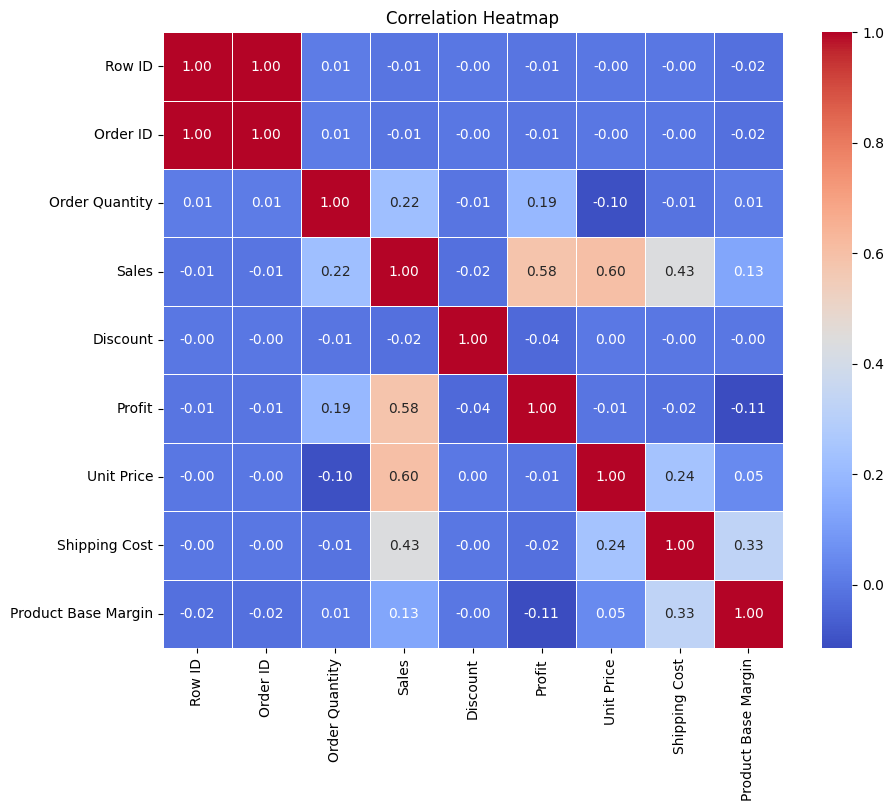

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix (only numeric columns)
corr_matrix = salesdf.corr(numeric_only=True)

# Initialize lists for categorized correlations
high_positive = []
mid_positive = []
high_negative = []
mid_negative = []

# Extract pairs without repetition (upper triangle of the correlation matrix)
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):  # Avoid duplicate pairs
        var1, var2 = corr_matrix.columns[i], corr_matrix.columns[j]
        corr_value = corr_matrix.iloc[i, j]

        if corr_value > 0.5:
            high_positive.append((var1, var2, round(corr_value, 3)))
        elif 0.3 <= corr_value <= 0.5:
            mid_positive.append((var1, var2, round(corr_value, 3)))
        elif corr_value < -0.5:
            high_negative.append((var1, var2, round(corr_value, 3)))
        elif -0.5 <= corr_value <= -0.3:
            mid_negative.append((var1, var2, round(corr_value, 3)))

# Print categorized correlation pairs
print("\nHigh Positive Correlation (>0.5):", high_positive)
print("\nMid Positive Correlation (0.3 - 0.5):", mid_positive)
print("\nHigh Negative Correlation (<-0.5):", high_negative)
print("\nMid Negative Correlation (-0.3 to -0.5):", mid_negative)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

here we can see two major correlations: sales is affected by profit and unit price, and vice versa. minor coorelations include sales being affected by shipping cost, and product base marigin being affected by shipping cost